In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Carregando os dados

In [2]:
df = pd.read_csv('titanic.csv', encoding='utf-8')

In [3]:
f"Número de linhas no dataset: {df.shape[0]}"

'Número de linhas no dataset: 891'

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Analisando os valores presentes no dataset

<Axes: >

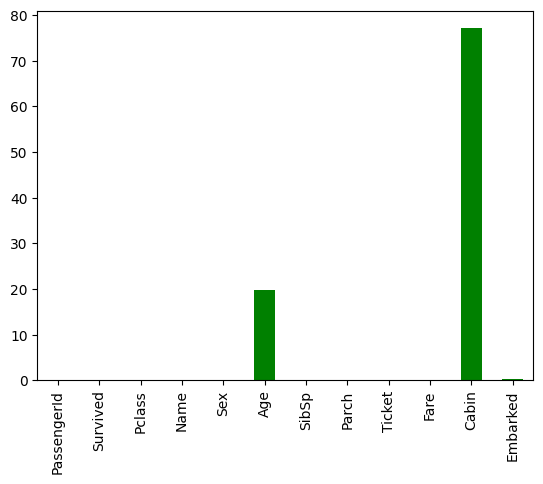

In [5]:
null_df = round(df.isnull().sum()/df.shape[0],3) * 100
null_df.plot(kind="bar",color="green")

In [6]:
# Removendo as colunas PassengerId, Cabin, Ticket e Nome pois são colunas de Id ou colunas que não serão usadas no modelo
df = df.drop(columns=['Cabin', 'Name', 'Ticket','PassengerId'])

## Tratamento de valores nulos

In [7]:
df = df.dropna(subset=["Embarked"]).reset_index(drop=True)

In [8]:
mean_age_by_sex = df.groupby('Sex')['Age'].transform('mean')
df['Age'] = df['Age'].fillna(mean_age_by_sex).round(0).astype(int)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,male,27,0,0,13.0000,S
885,1,1,female,19,0,0,30.0000,S
886,0,3,female,28,1,2,23.4500,S
887,1,1,male,26,0,0,30.0000,C


## Transformando as colunas categoricas

In [10]:
df_dummies = pd.get_dummies(df["Sex"])
df = pd.concat([df, df_dummies], axis=1).drop("Sex", axis=1)

In [11]:
df_dummies = pd.get_dummies(df["Embarked"])
df = pd.concat([df, df_dummies], axis=1).drop("Embarked", axis=1)

In [12]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22,1,0,7.2500,False,True,False,False,True
1,1,1,38,1,0,71.2833,True,False,True,False,False
2,1,3,26,0,0,7.9250,True,False,False,False,True
3,1,1,35,1,0,53.1000,True,False,False,False,True
4,0,3,35,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,27,0,0,13.0000,False,True,False,False,True
885,1,1,19,0,0,30.0000,True,False,False,False,True
886,0,3,28,1,2,23.4500,True,False,False,False,True
887,1,1,26,0,0,30.0000,False,True,True,False,False


## Tratando outliers

### Age

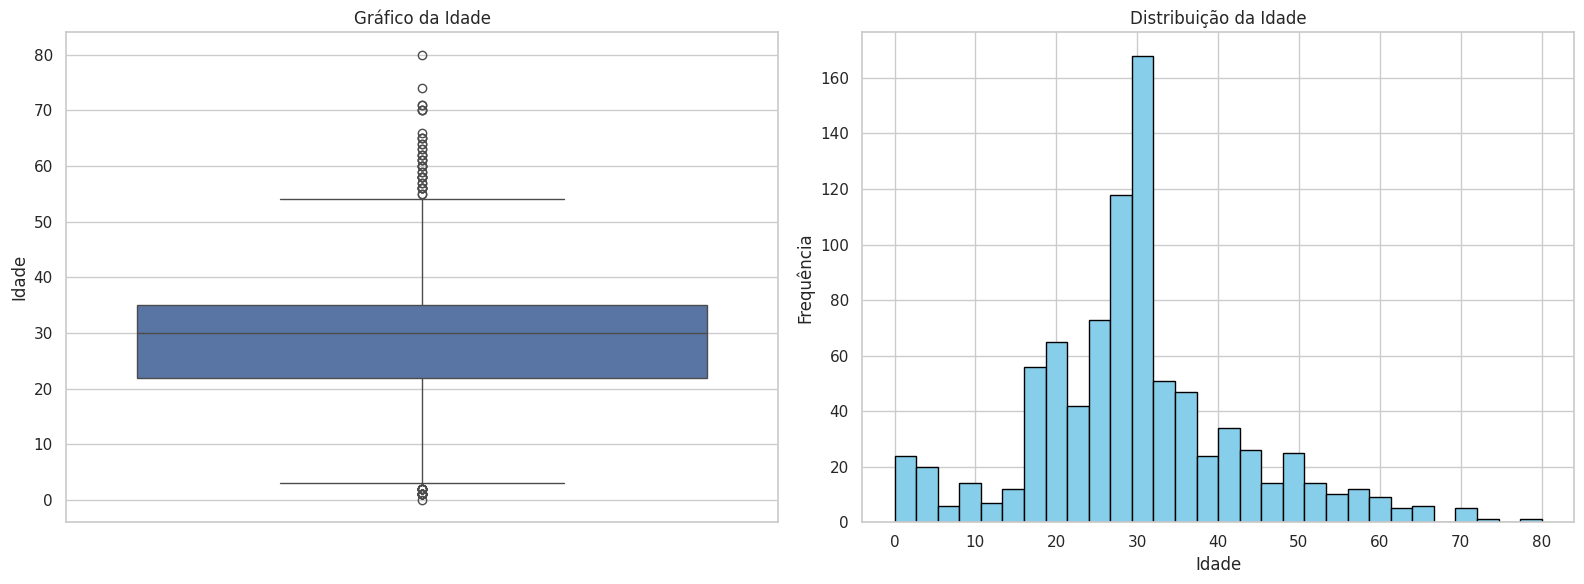

In [13]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=axes[0], y='Age', data=df, whis=1.5)
axes[0].set_title('Gráfico da Idade')
axes[0].set_ylabel('Idade')

axes[1].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Distribuição da Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [14]:
mean_age = df['Age'].mean()
std_dev_age = df['Age'].std()

upper_limit = mean_age + 3 * std_dev_age
lower_limit = mean_age - 3 * std_dev_age

df = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]

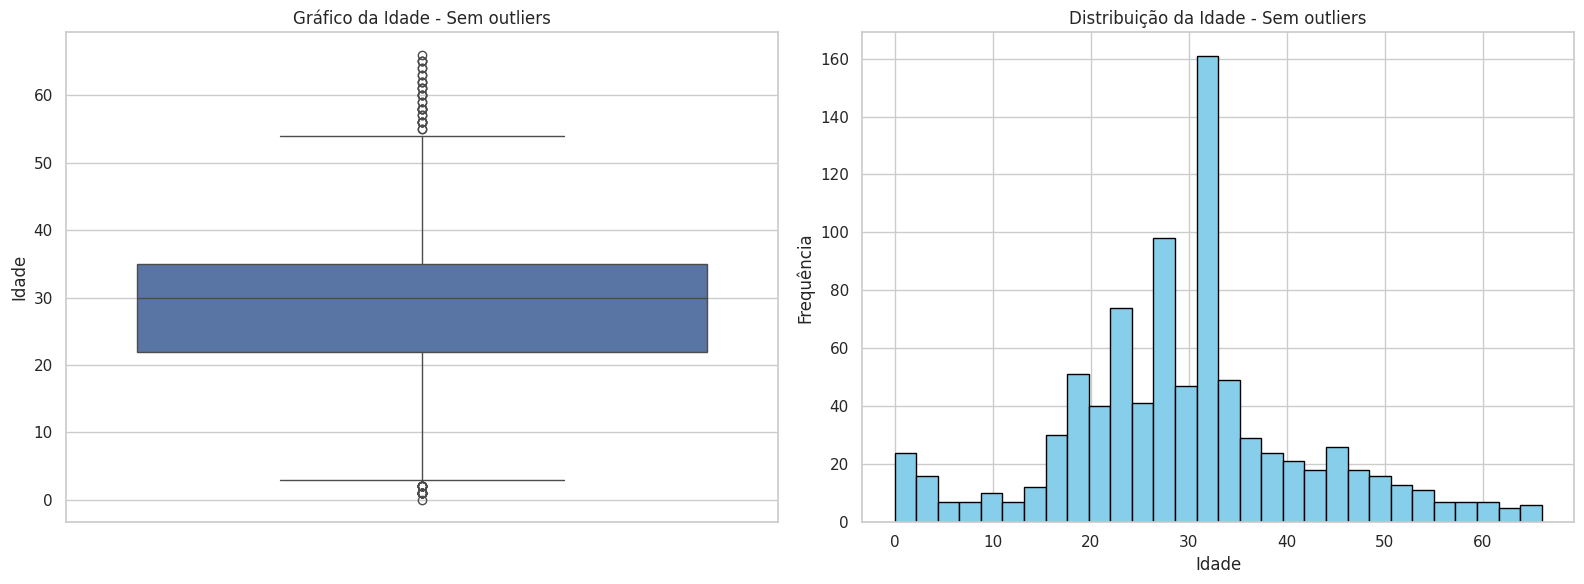

In [15]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=axes[0], y='Age', data=df, whis=1.5)
axes[0].set_title('Gráfico da Idade - Sem outliers')
axes[0].set_ylabel('Idade')

axes[1].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Distribuição da Idade - Sem outliers')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Fare

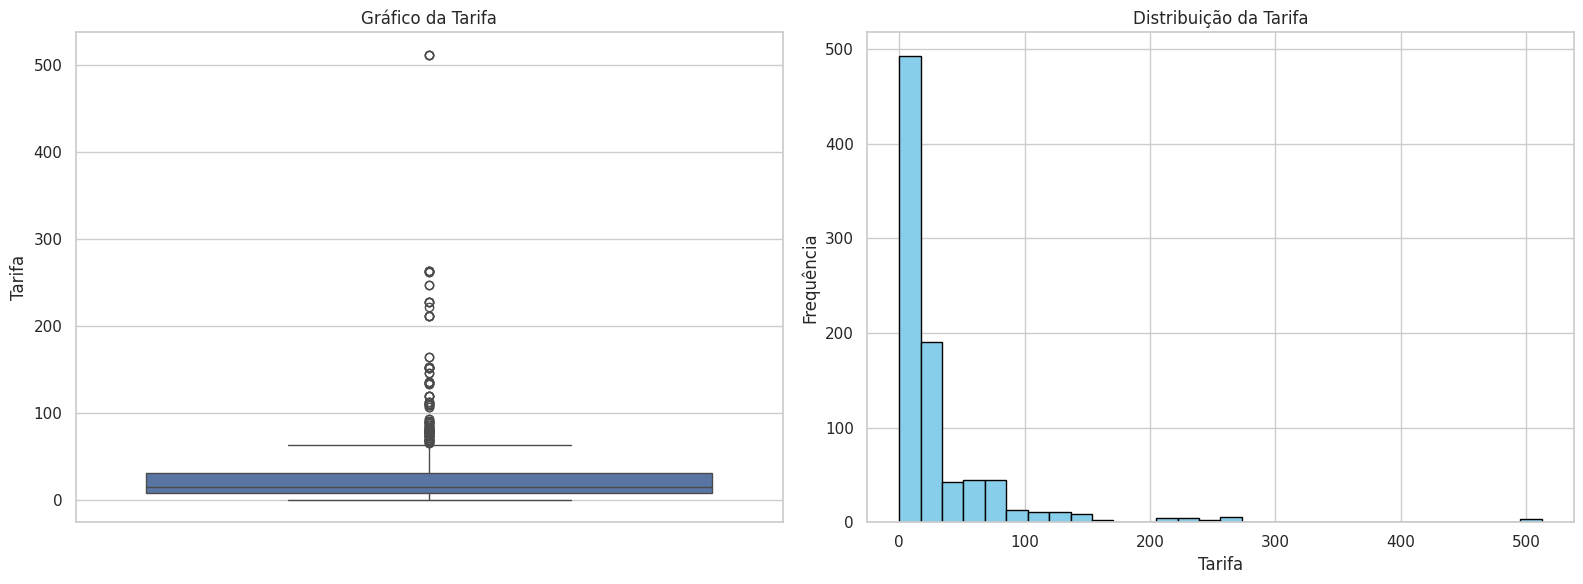

In [16]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=axes[0], y='Fare', data=df, whis=1.5)
axes[0].set_title('Gráfico da Tarifa')
axes[0].set_ylabel('Tarifa')

axes[1].hist(df['Fare'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Distribuição da Tarifa')
axes[1].set_xlabel('Tarifa')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [17]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculando o IQR
IQR = Q3 - Q1

# Definindo os limites inferior e superior para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrando os outliers
df = df[(df['Fare'] >= lower_limit) & (df['Fare'] <= upper_limit)]


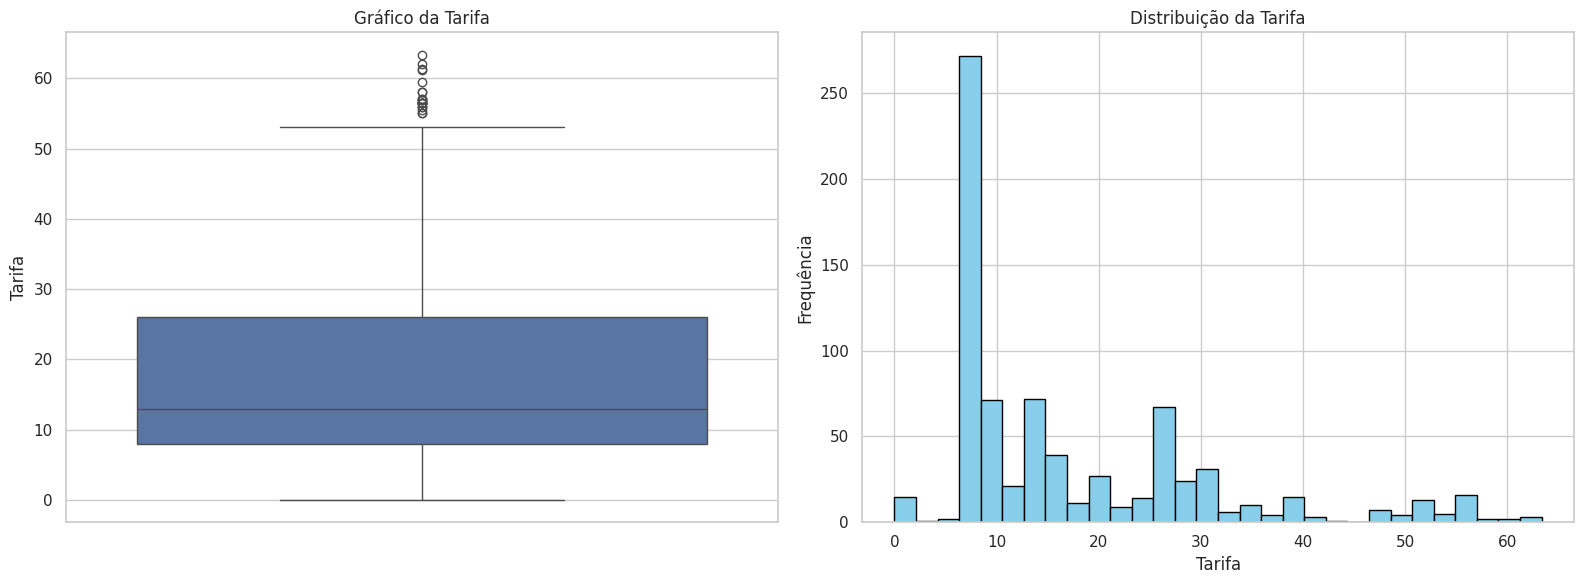

In [18]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(ax=axes[0], y='Fare', data=df, whis=1.5)
axes[0].set_title('Gráfico da Tarifa')
axes[0].set_ylabel('Tarifa')

axes[1].hist(df['Fare'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Distribuição da Tarifa')
axes[1].set_xlabel('Tarifa')
axes[1].set_ylabel('Frequência')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [19]:
f"Após os tratamentos temos {df.shape[0]} linhas no dataset"

'Após os tratamentos temos 767 linhas no dataset'

## Correlação

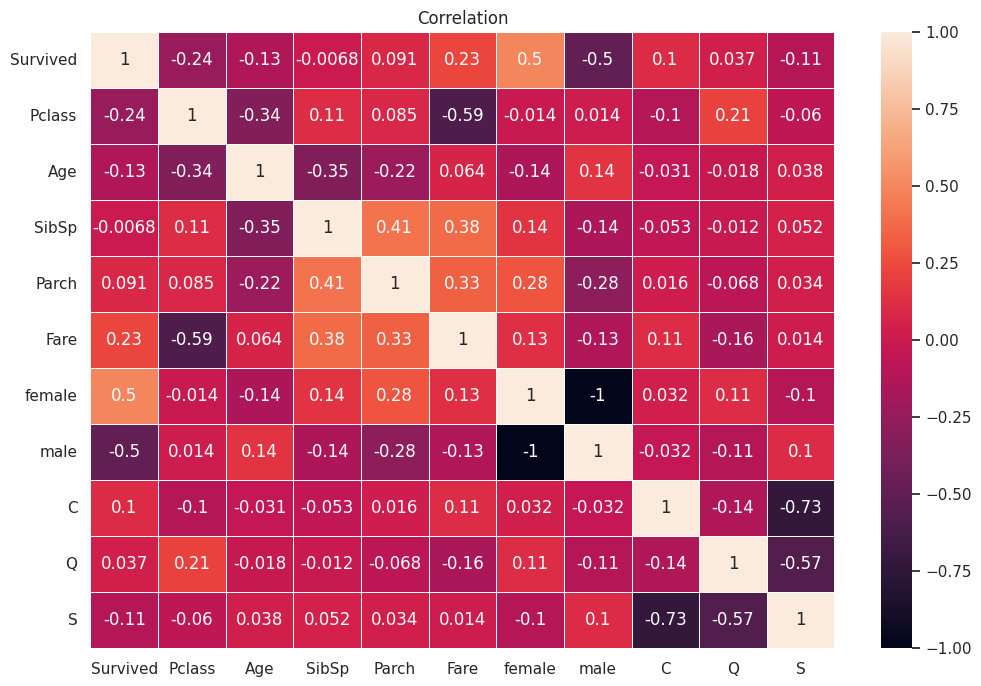

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), linewidth=.5, annot=True)
plt.title('Correlation')
plt.show()

## Criando o modelo

### Com todas as colunas

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
model.score(X_test, y_test)

0.7792207792207793

### Removendo colunas com baixa correlação

In [25]:
correlation = df.corr()['Survived'].abs()
# Definindo o limiar de correlação (por exemplo, 0.1 para baixa correlação)
threshold = 0.1

# Identificando as colunas com baixa correlação com 'Survived'
low_correlation_columns = correlation[abs(correlation) < threshold].index

df_filter = df.drop(columns=low_correlation_columns)
df_filter

,Survived,Pclass,Age,Fare,female,male,C,S
0,0,3,22,7.2500,False,True,False,True
2,1,3,26,7.9250,True,False,False,True
3,1,1,35,53.1000,True,False,False,True
4,0,3,35,8.0500,False,True,False,True
5,0,3,31,8.4583,False,True,False,False
...,...,...,...,...,...,...,...,...
884,0,2,27,13.0000,False,True,False,True
885,1,1,19,30.0000,True,False,False,True
886,0,3,28,23.4500,True,False,False,True
887,1,1,26,30.0000,False,True,True,False


In [26]:
X = df_filter.drop('Survived', axis=1)
y = df_filter['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

In [28]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
model.score(X_test, y_test)

0.7987012987012987